In [4]:

import pandas as pd
import numpy as np
import os 
import nltk
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Utilize Paralell computing to speed up loading the data

In [5]:
# Use dask parallel compute to load the data


import dask.dataframe as dd
data = (r'C:\Users\phili\OneDrive\Desktop\Contracts Project\FY2020_All_Contracts_Full_20210809_2.csv')
df = dd.read_csv(data, dtype={'dod_acquisition_program_code': 'object',\
                              'naics_code': 'object',\
                              'parent_award_agency_id': 'object',\
                              'primary_place_of_performance_zip_4': 'object',\
                              'program_acronym': 'object',\
                              'recipient_fax_number': 'object',\
                              'recipient_parent_duns': 'object',\
                              'recipient_phone_number': 'object',\
                              'recipient_zip_4_code': 'object',\
                              'sam_exception_description': 'object',\
                             })
df

,contract_transaction_unique_key,contract_award_unique_key,award_id_piid,modification_number,transaction_number,parent_award_agency_id,parent_award_agency_name,parent_award_id_piid,parent_award_modification_number,federal_action_obligation,total_dollars_obligated,base_and_exercised_options_value,current_total_value_of_award,base_and_all_options_value,potential_total_value_of_award,disaster_emergency_fund_codes_for_overall_award,outlayed_amount_funded_by_COVID-19_supplementals_for_overall_aw,obligated_amount_funded_by_COVID-19_supplementals_for_overall_a,action_date,action_date_fiscal_year,period_of_performance_start_date,period_of_performance_current_end_date,period_of_performance_potential_end_date,ordering_period_end_date,solicitation_date,awarding_agency_code,awarding_agency_name,awarding_sub_agency_code,awarding_sub_agency_name,awarding_office_code,awarding_office_name,funding_agency_code,funding_agency_name,funding_sub_agency_code,funding_sub_agency_name,funding_office_code,funding_office_name,treasury_accounts_funding_this_award,federal_accounts_funding_this_award,object_classes_funding_this_award,program_activities_funding_this_award,foreign_funding,foreign_funding_description,sam_exception,sam_exception_description,recipient_duns,recipient_name,recipient_doing_business_as_name,cage_code,recipient_parent_duns,recipient_parent_name,recipient_country_code,recipient_country_name,recipient_address_line_1,recipient_address_line_2,recipient_city_name,recipient_county_name,recipient_state_code,recipient_state_name,recipient_zip_4_code,recipient_congressional_district,recipient_phone_number,recipient_fax_number,primary_place_of_performance_country_code,primary_place_of_performance_country_name,primary_place_of_performance_city_name,primary_place_of_performance_county_name,primary_place_of_performance_state_code,primary_place_of_performance_state_name,primary_place_of_performance_zip_4,primary_place_of_performance_congressional_district,award_or_idv_flag,award_type_code,award_type,idv_type_code,idv_type,multiple_or_single_award_idv_code,multiple_or_single_award_idv,type_of_idc_code,type_of_idc,type_of_contract_pricing_code,type_of_contract_pricing,award_description,action_type_code,action_type,solicitation_identifier,number_of_actions,inherently_governmental_functions,inherently_governmental_functions_description,product_or_service_code,product_or_service_code_description,contract_bundling_code,contract_bundling,dod_claimant_program_code,dod_claimant_program_description,naics_code,naics_description,recovered_materials_sustainability_code,recovered_materials_sustainability,domestic_or_foreign_entity_code,domestic_or_foreign_entity,dod_acquisition_program_code,dod_acquisition_program_description,information_technology_commercial_item_category_code,information_technology_commercial_item_category,epa_designated_product_code,epa_designated_product,country_of_product_or_service_origin_code,country_of_product_or_service_origin,place_of_manufacture_code,place_of_manufacture,subcontracting_plan_code,subcontracting_plan,extent_competed_code,extent_competed,solicitation_procedures_code,solicitation_procedures,type_of_set_aside_code,type_of_set_aside,evaluated_preference_code,evaluated_preference,research_code,research,fair_opportunity_limited_sources_code,fair_opportunity_limited_sources,other_than_full_and_open_competition_code,other_than_full_and_open_competition,number_of_offers_received,commercial_item_acquisition_procedures_code,commercial_item_acquisition_procedures,small_business_competitiveness_demonstration_program,simplified_procedures_for_certain_commercial_items_code,simplified_procedures_for_certain_commercial_items,a76_fair_act_action_code,a76_fair_act_action,fed_biz_opps_code,fed_biz_opps,local_area_set_aside_code,local_area_set_aside,price_evaluation_adjustment_preference_percent_difference,clinger_cohen_act_planning_code,clinger_cohen_act_planning,materials_supplies_articles_equipment_code,materials_supplies_articles_equip

In [6]:
# See all column names
df.columns.values

array(['contract_transaction_unique_key', 'contract_award_unique_key',
       'award_id_piid', 'modification_number', 'transaction_number',
       'parent_award_agency_id', 'parent_award_agency_name',
       'parent_award_id_piid', 'parent_award_modification_number',
       'federal_action_obligation', 'total_dollars_obligated',
       'base_and_exercised_options_value', 'current_total_value_of_award',
       'base_and_all_options_value', 'potential_total_value_of_award',
       'disaster_emergency_fund_codes_for_overall_award',
       'outlayed_amount_funded_by_COVID-19_supplementals_for_overall_aw',
       'obligated_amount_funded_by_COVID-19_supplementals_for_overall_a',
       'action_date', 'action_date_fiscal_year',
       'period_of_performance_start_date',
       'period_of_performance_current_end_date',
       'period_of_performance_potential_end_date',
       'ordering_period_end_date', 'solicitation_date',
       'awarding_agency_code', 'awarding_agency_name',
       'awardi

In [7]:
# Covert data back to pandas
df= df.compute()

C:\Users\phili\Anaconda3\lib\multiprocessing\pool.py:125: DtypeWarning: Columns (121,122) have mixed types.Specify dtype option on import or set low_memory=False.
  result = (True, func(*args, **kwds))


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 14477
Columns: 282 entries, contract_transaction_unique_key to last_modified_date
dtypes: float64(20), int64(4), object(258)
memory usage: 2.1+ GB


In [9]:
# Create a small subset of the data for better performance
df = df[['contract_transaction_unique_key', 'contract_award_unique_key',
       'award_id_piid', 'transaction_number',
       'parent_award_agency_id', 'parent_award_agency_name','funding_office_name','action_date',\
         'primary_place_of_performance_state_name',\
       'federal_action_obligation', 'total_dollars_obligated','awarding_agency_name','award_description','award_type']]
df.head()
# df.to_csv('tableau_data.csv', sep='\t', encoding='utf-8')


,contract_transaction_unique_key,contract_award_unique_key,award_id_piid,transaction_number,parent_award_agency_id,parent_award_agency_name,funding_office_name,action_date,primary_place_of_performance_state_name,federal_action_obligation,total_dollars_obligated,awarding_agency_name,award_description,award_type
0,1501_4730_15JA3420F00000002_0_GS25F0011M_0,CONT_AWD_15JA3420F00000002_1501_GS25F0011M_4730,15JA3420F00000002,0.0,4730,FEDERAL ACQUISITION SERVICE,U.S. ATTORNEYS OFFICE-LA(E) (USA33),2019-10-16,LOUISIANA,6685.00,5217.22,DEPARTMENT OF JUSTICE (DOJ),"PAPER SHREDDING SERVICES, PURGING, AND CD/DVD/...",DELIVERY ORDER
1,9700_9700_SPE3SU20F777Q_0_SPE30017DS910_0,CONT_AWD_SPE3SU20F777Q_9700_SPE30017DS910_9700,SPE3SU20F777Q,0.0,9700,DEPT OF DEFENSE,DLA TROOP SUPPORT,2020-02-10,CONNECTICUT,231.38,231.38,DEPARTMENT OF DEFENSE (DOD),"4548978609!BROCCOLI FLORETS, CHL,",DELIVERY ORDER
2,9700_9700_SPE3SU20FDUK6_0_SPE30016DS675_0,CONT_AWD_SPE3SU20FDUK6_9700_SPE30016DS675_9700,SPE3SU20FDUK6,0.0,9700,DEPT OF DEFENSE,DLA TROOP SUPPORT,2020-09-11,TEXAS,550.99,550.99,DEPARTMENT OF DEFENSE (DOD),"4551064673!APPLES, CHL,",DELIVERY ORDER
3,9700_9700_FA700020F0001_P00001_FA700018D0007_0,CONT_AWD_FA700020F0001_9700_FA700018D0007_9700,FA700020F0001,0.0,9700,DEPT OF DEFENSE,10 CE,2020-09-24,COLORADO,277.50,17767.50,DEPARTMENT OF DEFENSE (DOD),PORTABLE CHEMICAL TOILETS - ADD FUNDS TO TASK ...,DELIVERY ORDER
4,9700_9700_SPE2D620F5SH0_0_SPE2DE17D0006_0,CONT_AWD_SPE2D620F5SH0_9700_SPE2DE17D0006_9700,SPE2D620F5SH0,0.0,9700,DEPT OF DEFENSE,DLA TROOP SUPPORT,2020-08-28,WISCONSIN,233.50,233.50,DEPARTMENT OF DEFENSE (DOD),4550932588!STERILE I-PAK DISPOSABLE 3 IN 1 ORA...,DELIVERY ORDER


In [10]:
# selecet a random sample size of 10K
df = df.sample(n=10000,replace=True)
df.shape

(10000, 14)

In [11]:
df  = df.dropna()
df =df.dropna(subset=['award_description'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7804 entries, 17607 to 26240
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   contract_transaction_unique_key          7804 non-null   object 
 1   contract_award_unique_key                7804 non-null   object 
 2   award_id_piid                            7804 non-null   object 
 3   transaction_number                       7804 non-null   float64
 4   parent_award_agency_id                   7804 non-null   object 
 5   parent_award_agency_name                 7804 non-null   object 
 6   funding_office_name                      7804 non-null   object 
 7   action_date                              7804 non-null   object 
 8   primary_place_of_performance_state_name  7804 non-null   object 
 9   federal_action_obligation                7804 non-null   float64
 10  total_dollars_obligated                  78

In [12]:
import nltk
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
stop = stopwords.words('english')

pipeline = Pipeline([
    ('vect', TfidfVectorizer(tokenizer = word_tokenize, stop_words=stop))
    
])    

In [15]:
# Assign the column I want to use as req then run it through the pipeline, fit and transform it

req = df['award_description']
X = pipeline.fit_transform(req).todense()
X.shape


(7804, 14244)

In [16]:
# TSNE function that reshapes the matrix into a 2D format

import numpy as np
from sklearn.manifold import TSNE
X = TSNE(n_components=2).fit_transform(X)
X.shape

(7804, 2)

In [19]:
# Setting eps to be very small will mean that no points are core samples, and may lead to all points being labeled as noise.
# Setting eps to be very large will result in all points forming a single cluster.

db = DBSCAN(eps=1, min_samples=2).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

from collections import Counter
clusters = Counter(db.labels_)

print(labels)
print ("----------------------------------------------------------")
# print(clusters)
print ("----------------------------------------------------------")
print('Number of clusters: %d' % n_clusters_)
print("----------------------------------------------------------")
print('Number of noise points: %d' % n_noise_)

[  0  -1   1 ... 215  29 151]
----------------------------------------------------------
----------------------------------------------------------
Number of clusters: 922
----------------------------------------------------------
Number of noise points: 577


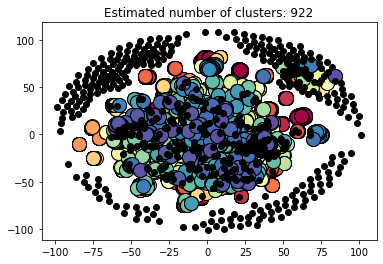

In [18]:

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()